### Import Libraries

In [359]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings

### Load Dataset

In [360]:
df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Understanding the data

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [288]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [313]:
# Check unique values for all object (categorical) columns
# Exclude Loan_ID
for col in df.select_dtypes(include="object").columns.drop("Loan_ID"):
    print(f"{col}: {df[col].unique()}")
    print("-"*40)

Gender: ['Male' 'Female' nan]
----------------------------------------
Married: ['No' 'Yes' nan]
----------------------------------------
Dependents: ['0' '1' '2' '3+' nan]
----------------------------------------
Education: ['Graduate' 'Not Graduate']
----------------------------------------
Self_Employed: ['No' 'Yes' nan]
----------------------------------------
Property_Area: ['Urban' 'Rural' 'Semiurban']
----------------------------------------
Loan_Status: ['Y' 'N']
----------------------------------------


In [282]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Exploratory Data Analysis (EDA)

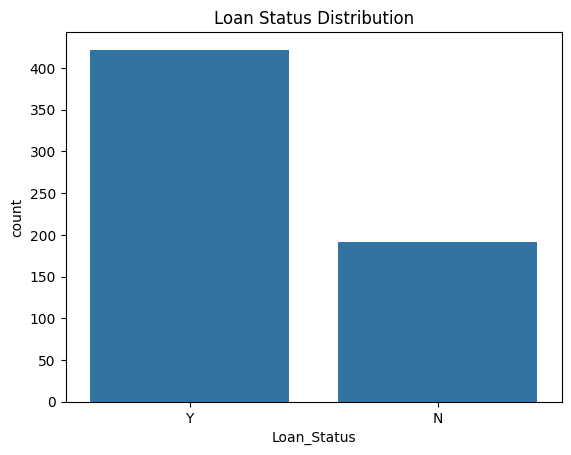

In [251]:
# Distribution of target variable
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Distribution")
plt.show()

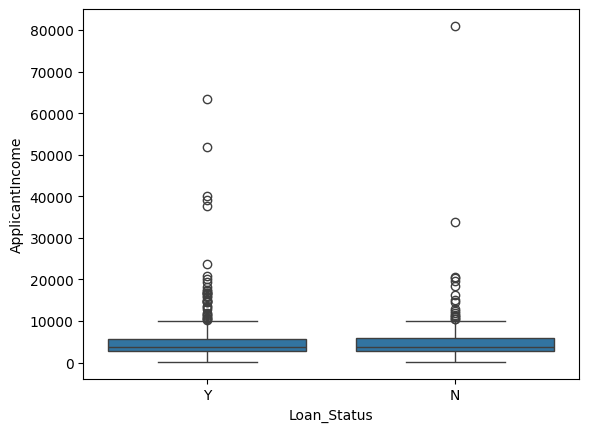

In [252]:
# Boxplot for income vs loan status
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.show()

#### Distribution of Numerical Features

We’ll plot histograms and boxplots to see spread, skewness, and outliers.

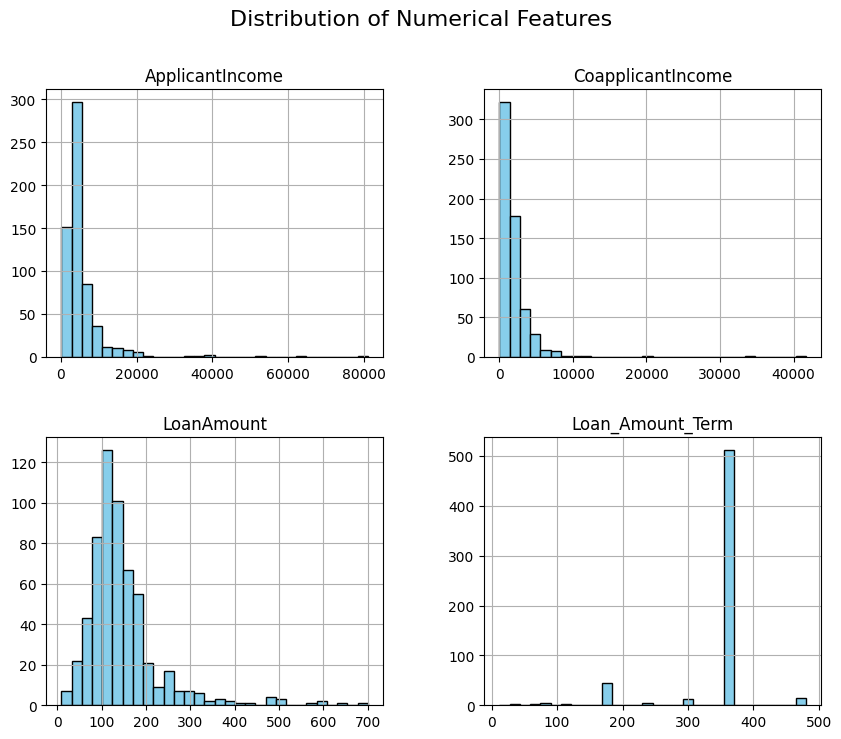

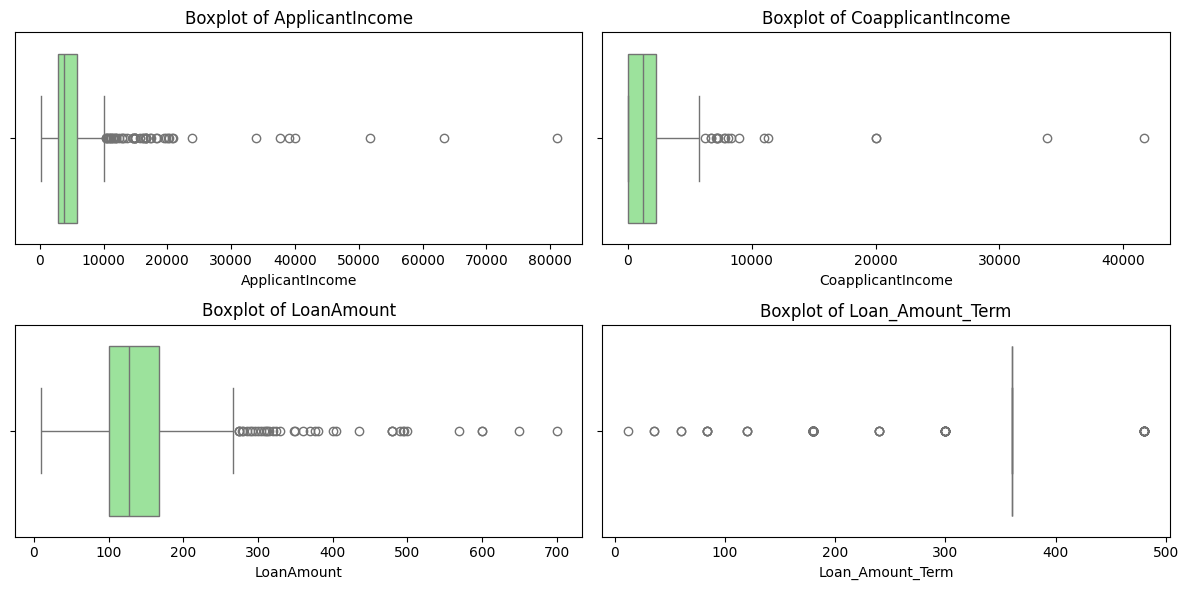

In [290]:
# Numerical features
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Histograms
df[num_cols].hist(figsize=(10,8), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


#### Distribution of Categorical Features

C:\Users\user\AppData\Local\Temp\ipykernel_2624\3503128347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_2624\3503128347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_2624\3503128347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_2624\3503128347.py:6: FutureWarning: 

Passing `palette` without assi

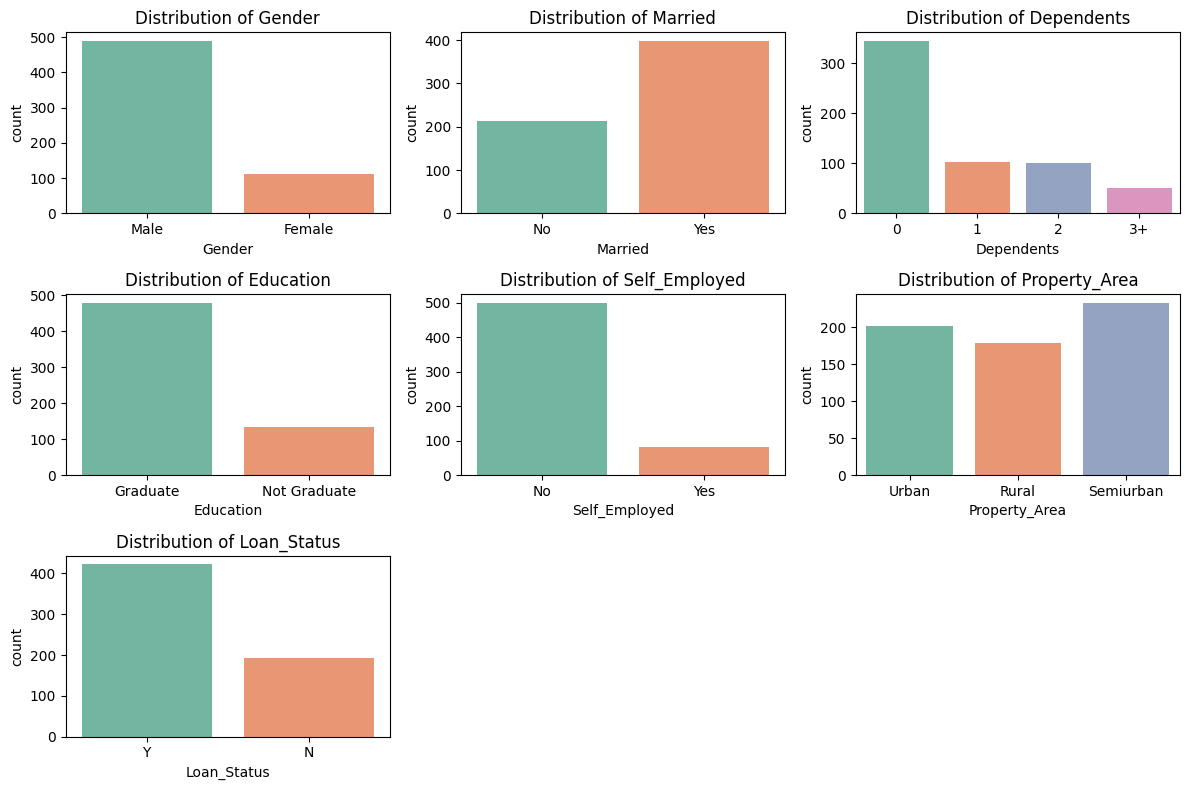

In [291]:
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

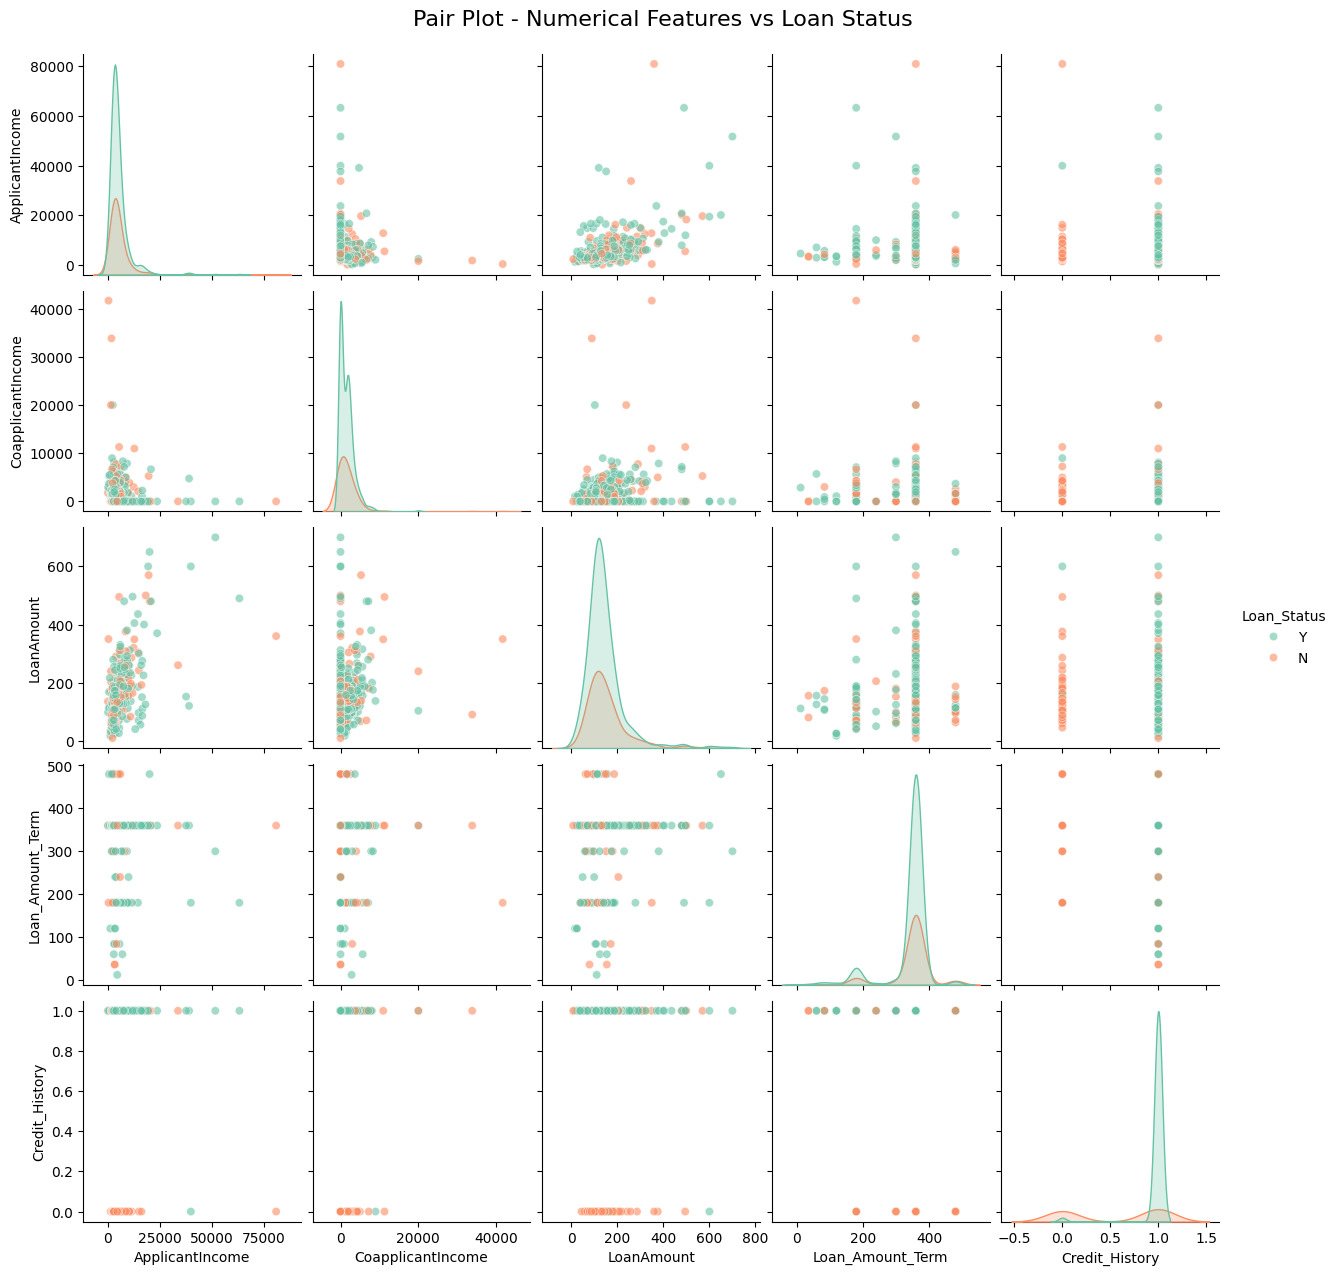

In [255]:
# Select numerical features + target
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"]

# Pair plot
sns.pairplot(df[num_cols], hue="Loan_Status", diag_kind="kde", palette="Set2", plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot - Numerical Features vs Loan Status", y=1.02, fontsize=16)
plt.show()

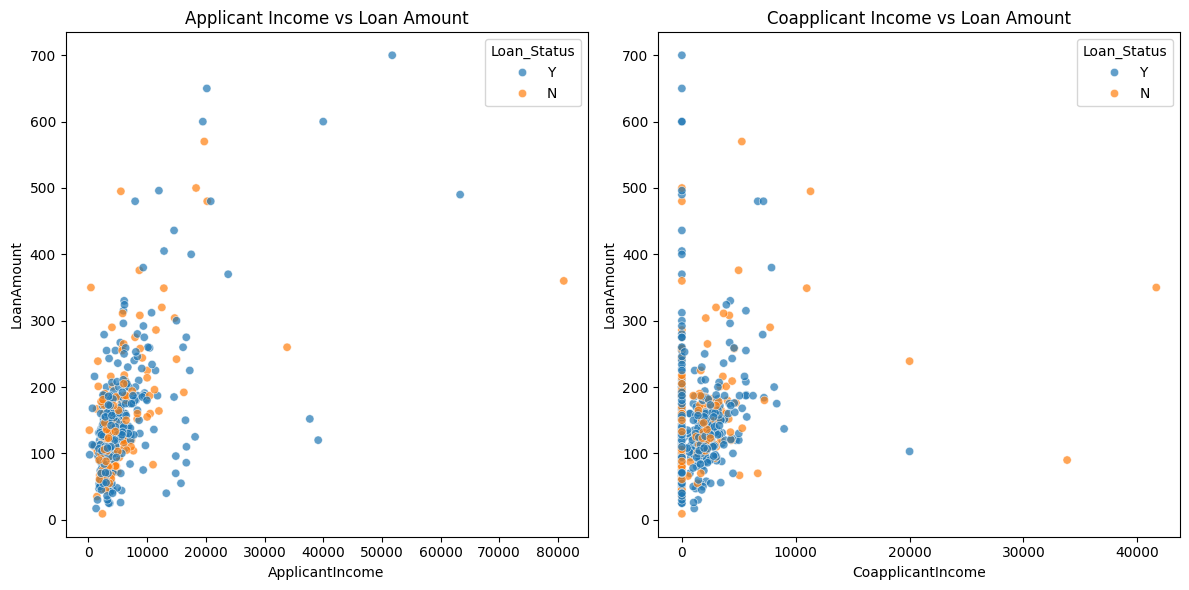

In [256]:
# Scatterplots for linearity check
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df, hue="Loan_Status", alpha=0.7)
plt.title("Applicant Income vs Loan Amount")

plt.subplot(1,2,2)
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", data=df, hue="Loan_Status", alpha=0.7)
plt.title("Coapplicant Income vs Loan Amount")

plt.tight_layout()
plt.show()


### Data Preprocessing

In [361]:
# Drop columns not useful for prediction
df.drop(["Loan_ID", "Dependents"], axis=1, inplace=True)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [363]:
# check missing values
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [364]:
# Fill categorical columns with mode
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical columns with median
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [365]:
# Check unique values for all object (categorical) columns
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].unique()}")
    print("-"*40)

Gender: ['Male' 'Female']
----------------------------------------
Married: ['No' 'Yes']
----------------------------------------
Education: ['Graduate' 'Not Graduate']
----------------------------------------
Self_Employed: ['No' 'Yes']
----------------------------------------
Property_Area: ['Urban' 'Rural' 'Semiurban']
----------------------------------------
Loan_Status: ['Y' 'N']
----------------------------------------


#### Encoding Categorical Variables

In [366]:
from sklearn.preprocessing import LabelEncoder

# Binary encoding
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

# One-hot encoding for Property_Area
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True).astype(int)

In [367]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0,128,360,1,1,0,1
1,1,1,1,0,4583,1508,128,360,1,0,0,0
2,1,1,1,1,3000,0,66,360,1,1,0,1
3,1,1,0,0,2583,2358,120,360,1,1,0,1
4,1,0,1,0,6000,0,141,360,1,1,0,1


### Define features & target

In [368]:
# Define features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

### Split the data

In [369]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE, training target distribution:")
print(y_train.value_counts())

Before SMOTE, training target distribution:
Loan_Status
1    337
0    154
Name: count, dtype: int64


### Scale features

In [333]:
num_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
cat_features = [col for col in X.columns if col not in num_features]

In [345]:
# 1. Scale numeric features
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

### Apply SMOTE only on the training set

In [346]:
# Apply SMOTE on scaled training set
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 Loan_Status
1    337
0    154
Name: count, dtype: int64

After SMOTE:
 Loan_Status
1    337
0    337
Name: count, dtype: int64


### Modelling

#### Define Models

In [347]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

### Train Models

In [348]:
def train_models(models, X_train_res, y_train_res):
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train_res, y_train_res)
        trained_models[name] = model
    return trained_models

### Evaluation

In [349]:
def evaluate_models(models, X_train_res, y_train_res, X_test, y_test):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    for name, model in models.items():
        print("="*60)
        print(f"Model: {name}")
        print("="*60)

        # Predictions
        y_train_pred = model.predict(X_train_res)
        y_test_pred = model.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train_res, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        print(f"Train Accuracy: {train_acc:.2f}")
        print(f"Test Accuracy : {test_acc:.2f}")

        # Training set report
        print("\nClassification Report (Training Set):")
        print(classification_report(y_train_res, y_train_pred))

        # Test set report
        print("\nClassification Report (Test Set):")
        print(classification_report(y_test, y_test_pred))

        # Confusion Matrix (test set only for clarity)
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {name} (Test Set)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


c:\Users\user\Desktop\data-science-class\06-Machine_Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Train Accuracy: 0.78
Test Accuracy : 0.82

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       337
           1       0.74      0.86      0.80       337

    accuracy                           0.78       674
   macro avg       0.79      0.78      0.78       674
weighted avg       0.79      0.78      0.78       674


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        38
           1       0.87      0.87      0.87        85

    accuracy                           0.82       123
   macro avg       0.79      0.79      0.79       123
weighted avg       0.82      0.82      0.82       123



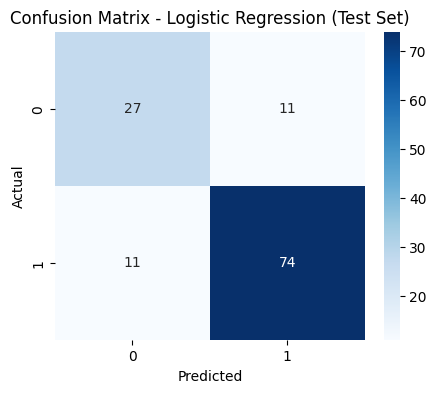

Model: Decision Tree
Train Accuracy: 1.00
Test Accuracy : 0.76

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       337

    accuracy                           1.00       674
   macro avg       1.00      1.00      1.00       674
weighted avg       1.00      1.00      1.00       674


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        38
           1       0.86      0.78      0.81        85

    accuracy                           0.76       123
   macro avg       0.72      0.74      0.73       123
weighted avg       0.77      0.76      0.76       123



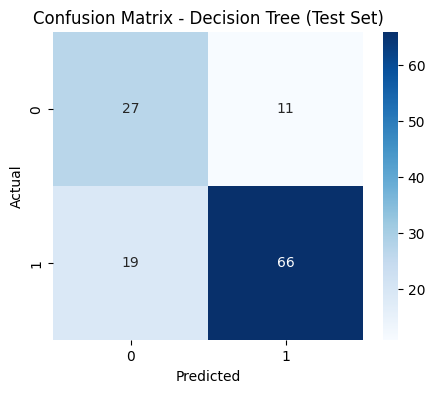

Model: Random Forest
Train Accuracy: 1.00
Test Accuracy : 0.81

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       337

    accuracy                           1.00       674
   macro avg       1.00      1.00      1.00       674
weighted avg       1.00      1.00      1.00       674


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        38
           1       0.86      0.87      0.87        85

    accuracy                           0.81       123
   macro avg       0.78      0.78      0.78       123
weighted avg       0.81      0.81      0.81       123



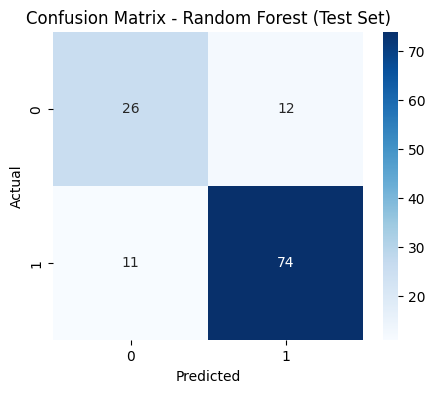

Model: Gradient Boosting
Train Accuracy: 0.92
Test Accuracy : 0.80

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       337
           1       0.88      0.96      0.92       337

    accuracy                           0.92       674
   macro avg       0.92      0.92      0.92       674
weighted avg       0.92      0.92      0.92       674


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        38
           1       0.84      0.88      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.76      0.76       123
weighted avg       0.80      0.80      0.80       123



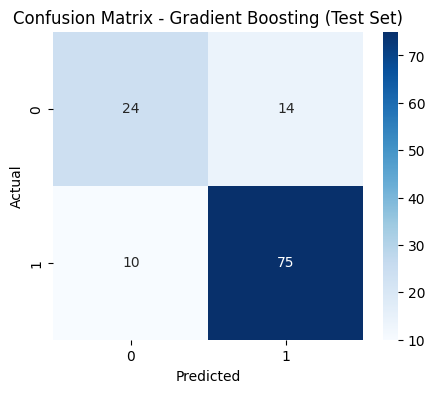

Model: SVM
Train Accuracy: 0.55
Test Accuracy : 0.49

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       337
           1       0.56      0.53      0.54       337

    accuracy                           0.55       674
   macro avg       0.55      0.55      0.55       674
weighted avg       0.55      0.55      0.55       674


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.23      0.29      0.26        38
           1       0.64      0.58      0.61        85

    accuracy                           0.49       123
   macro avg       0.44      0.43      0.43       123
weighted avg       0.52      0.49      0.50       123



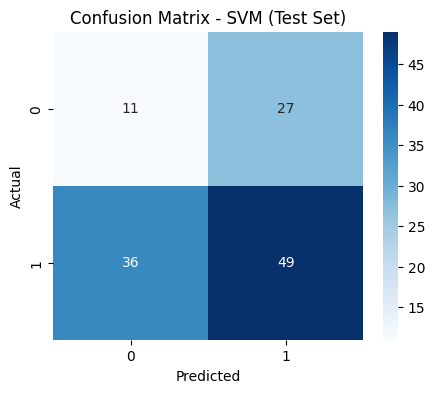

In [271]:
# Train models on resampled training set
trained_models = train_models(models, X_train_res, y_train_res)

# Evaluate on training + test sets
evaluate_models(trained_models, X_train_res, y_train_res, X_test, y_test)

#### Hyperparameter Tuning

In [350]:
param_grid = {
    "n_estimators": [100, 200],      
    "learning_rate": [0.1],          
    "max_depth": [3, 4],             
    "min_samples_split": [2, 5],     
    "min_samples_leaf": [1, 2],    
    "subsample": [0.8, 1.0]     
}

### Set Up Random Search

In [351]:
from sklearn.model_selection import RandomizedSearchCV

rand_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,             # only 20 random combinations
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2,
    random_state=42
)


### Fit on Training Data (SMOTE-Resampled)

In [352]:
rand_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.1], 'max_depth': [3, 4], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,n_iter,20
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


### Best Parameters & Model

In [353]:
best_gb = rand_search.best_estimator_
print("Best Parameters:", rand_search.best_params_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}


### Feature Importance

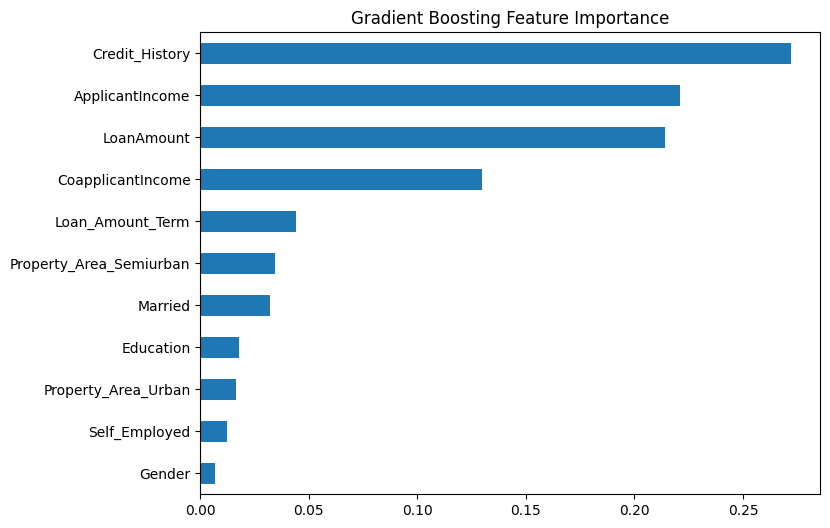

In [354]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(best_gb.feature_importances_, index=X_train_res.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Gradient Boosting Feature Importance")
plt.show()

### Train Gradient Boosting

In [355]:
# Train Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
best_gb = GradientBoostingClassifier(random_state=42)
best_gb.fit(X_train_res, y_train_res)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### Evaluate on Train and Test Sets

In [356]:
# Predict
y_train_pred = best_gb.predict(X_train_res)
y_test_pred = best_gb.predict(X_test_scaled) 

Model: Gradient Boosting
Train Accuracy: 0.91
Test Accuracy : 0.76

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       337
           1       0.88      0.94      0.91       337

    accuracy                           0.91       674
   macro avg       0.91      0.91      0.91       674
weighted avg       0.91      0.91      0.91       674


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.62      0.61      0.61        38
           1       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



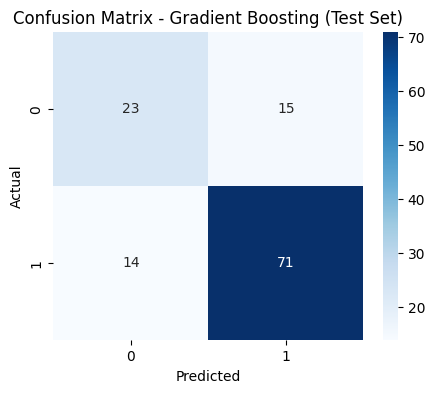

In [357]:
# Accuracy
train_acc = accuracy_score(y_train_res, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("============================================================")
print("Model: Gradient Boosting")
print("============================================================")
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy : {test_acc:.2f}")

# Classification reports
print("\nClassification Report (Training Set):")
print(classification_report(y_train_res, y_train_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix (Test Set)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

c:\Users\user\Desktop\data-science-class\06-Machine_Learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\Desktop\data-science-class\06-Machine_Learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Desktop\data-science-class\06-Machine_Learning\env\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
 

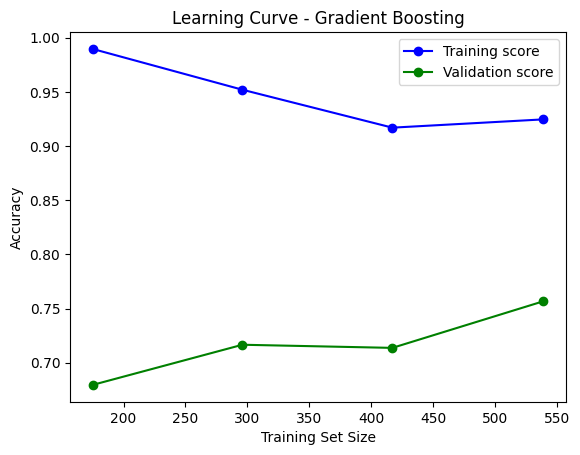

In [358]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_gb, X_train_res, y_train_res, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Gradient Boosting")
plt.legend()
plt.show()


### Save Your Model & Scaler

In [370]:
import joblib

# Save the trained model
joblib.dump(best_gb, "gradient_boosting_model.pkl")

# Save the scaler used for numeric features
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
